In [1]:
#!/usr/bin/env python

# ---------------------------------------------------------
# IOU Tracker
# Copyright (c) 2017 TU Berlin, Communication Systems Group
# Licensed under The MIT License [see LICENSE for details]
# Written by Erik Bochinski
# ---------------------------------------------------------


In [2]:
from time import time
import argparse

from lib.iou_tracker import track_iou
from lib.utils import load_mot, save_to_csv

In [75]:
args = { "detection_path": "../dataset/MOT17_resize/train/MOT17-02-DPM/det/det.txt",
         "sigma_l": -0.5 ,
         "sigma_h": 0.5,
         "sigma_iou": 0.5,
         "t_min": 4,
         "output_path": "../dataset/result/MOT17-02-DPM.txt"}

In [76]:
detections = load_mot(args["detection_path"])

start = time()
tracks = track_iou(detections, args["sigma_l"], args["sigma_h"], args["sigma_iou"], args["t_min"])
end = time()

num_frames = len(detections)
print("finished at " + str(int(num_frames / (end - start))) + " fps!")

save_to_csv(args["output_path"], tracks)

finished at 3623 fps!


In [77]:
from os import path
from glob import glob
from collections import defaultdict

In [78]:
data_path = '../dataset/'
image_path = '../dataset/MOT17_resize/train/MOT17-02-DPM/'
total_frame = 600

In [79]:
gt_seqs = defaultdict(dict)
with open(path.join(data_path, 'MOT17_resize/train/MOT17-02-DPM/gt', 'gt.txt')) as f:
    for seq, obj, *data in [line.strip().split(',') for line in f.readlines()]:
        gt_seqs[int(seq)][int(obj)] = data

In [80]:
result_seqs = defaultdict(dict)
with open(path.join(data_path, 'result', 'MOT17-02-DPM.txt')) as f:
    for seq, obj, *data in [line.strip().split(',') for line in f.readlines()]:
        result_seqs[int(seq)][int(obj)] = data

In [81]:
import matplotlib.pyplot as plt

In [82]:
x = range(1, total_frame+1)
y = [len(result_seqs[f]) / len(gt_seqs[f]) for f in x]

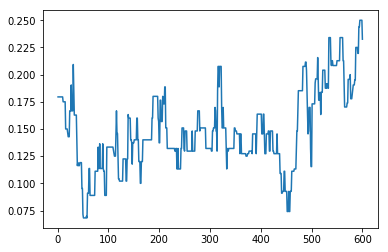

In [83]:
plt.plot(x, y)
plt.show()

In [48]:
from PIL import Image, ImageDraw
from IPython.display import display

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x540 at 0x1F4BA861160>


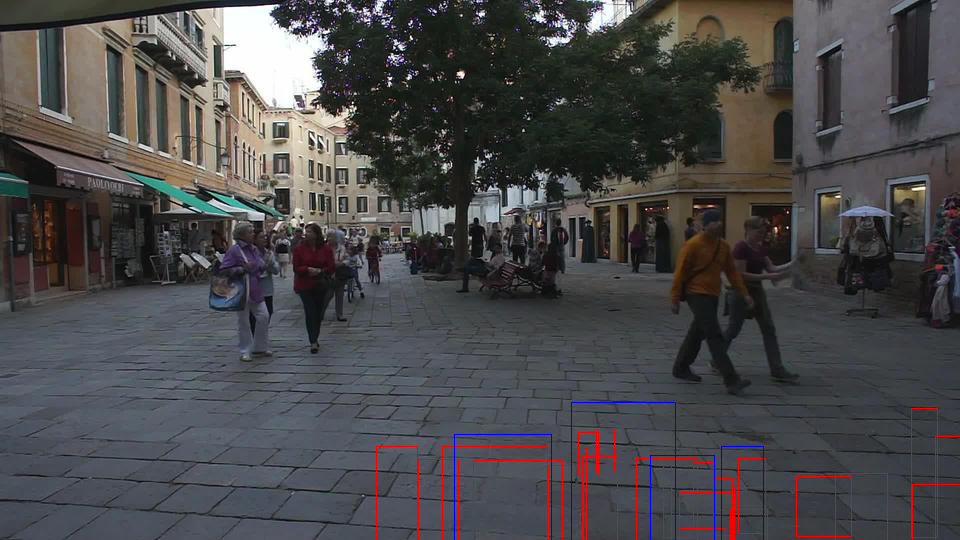

In [85]:
for frame in range(1, 2) :
    ig = Image.open(path.join(image_path, 'img1', '%06d.jpg' % (frame)))
    dr = ImageDraw.Draw(ig)
    for o, value in gt_seqs[frame].items():
        x, y, w, h, *_ = map(float, value)
        #print(x,y,w,h)
        dr.rectangle(((x, y), (x+w, y+h)), outline="red")
    for o, value in result_seqs[frame].items():
        x, y, w, h, *_ = map(float, value)
        dr.rectangle(((x, y), (x+w, y+h)), outline="blue")
    display(ig)